In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), ".."))
from misc_utils.color_palette import colors

In [2]:
linie = 'A'
goal = 'Werkerlast'

In [3]:
# Durch DB Abfrage ersetzen
data_A = pd.read_json('PlanA.json')
data_B = pd.read_json('PlanB.json')

In [71]:
data_A

,OP11,OP12,OP13,OP14,OP15,OP31,OP32,OP33,OP34,OP35,EOL Mech,EOL_elektr.,Deadline,Produktionsnummer
0,98.46,93.48,72.78,0.00,18.36,92.10,68.94,75.00,77.22,98.58,75.66,131.28,3600,23029663386
1,122.16,101.22,69.90,90.84,113.16,124.20,98.64,172.98,92.76,103.98,63.06,227.28,3780,23029663388
2,101.52,93.48,72.78,0.00,74.16,92.10,68.94,75.00,77.22,98.58,78.90,131.28,5580,23029663419
3,110.70,316.44,72.78,0.00,18.36,88.68,68.94,80.76,104.58,98.58,88.62,150.12,4320,23029663396
4,111.06,101.22,69.90,90.84,113.16,117.54,98.64,104.10,77.22,103.98,88.08,149.70,19464,23029707696
5,101.52,93.48,72.78,0.00,74.16,129.48,98.64,106.68,77.22,98.58,88.08,131.28,4860,23029663406
6,122.16,101.22,69.90,90.84,113.16,124.20,98.64,172.98,92.76,103.98,63.06,227.28,5220,23029663414
7,101.52,93.48,72.78,0.00,74.16,129.48,98.64,106.68,77.22,98.58,88.08,131.28,8100,23029663456
8,122.16,101.22,69.90,90.84,113.16,124.20,98.64,172.98,92.76,103.98,63.06,227.28,5760,23029663422
9,121.80,316.44,72.78,0.00,18.36,124.20,98.64,130.74,104.58,98.58,97.80,165.60,6120,23029663427


In [72]:
def plot_werkerlast_bar(data, border=120):
    fig, axs = plt.subplots(6, 2, figsize=[15, 24])
    axs = axs.flatten()
    names = ['OP11', 'OP12', 'OP13', 'OP14', 'OP15', 'OP31', 'OP32', 'OP33', 'OP34', 'OP35', 'EOL Mech', 'EOL_elektr.']
    xs = np.arange(0, len(data), 1)
    cmap = plt.get_cmap('RdYlGn')
    for idx, op in enumerate(names):
        heights = data[op].to_list()
        cs = [colors['green']['shade_2'] if height <= border else colors['red']['shade_3'] for height in heights]
        axs[idx].bar(xs, heights, color=cs, alpha=0.8)
        axs[idx].set_title(op)
    
    return fig

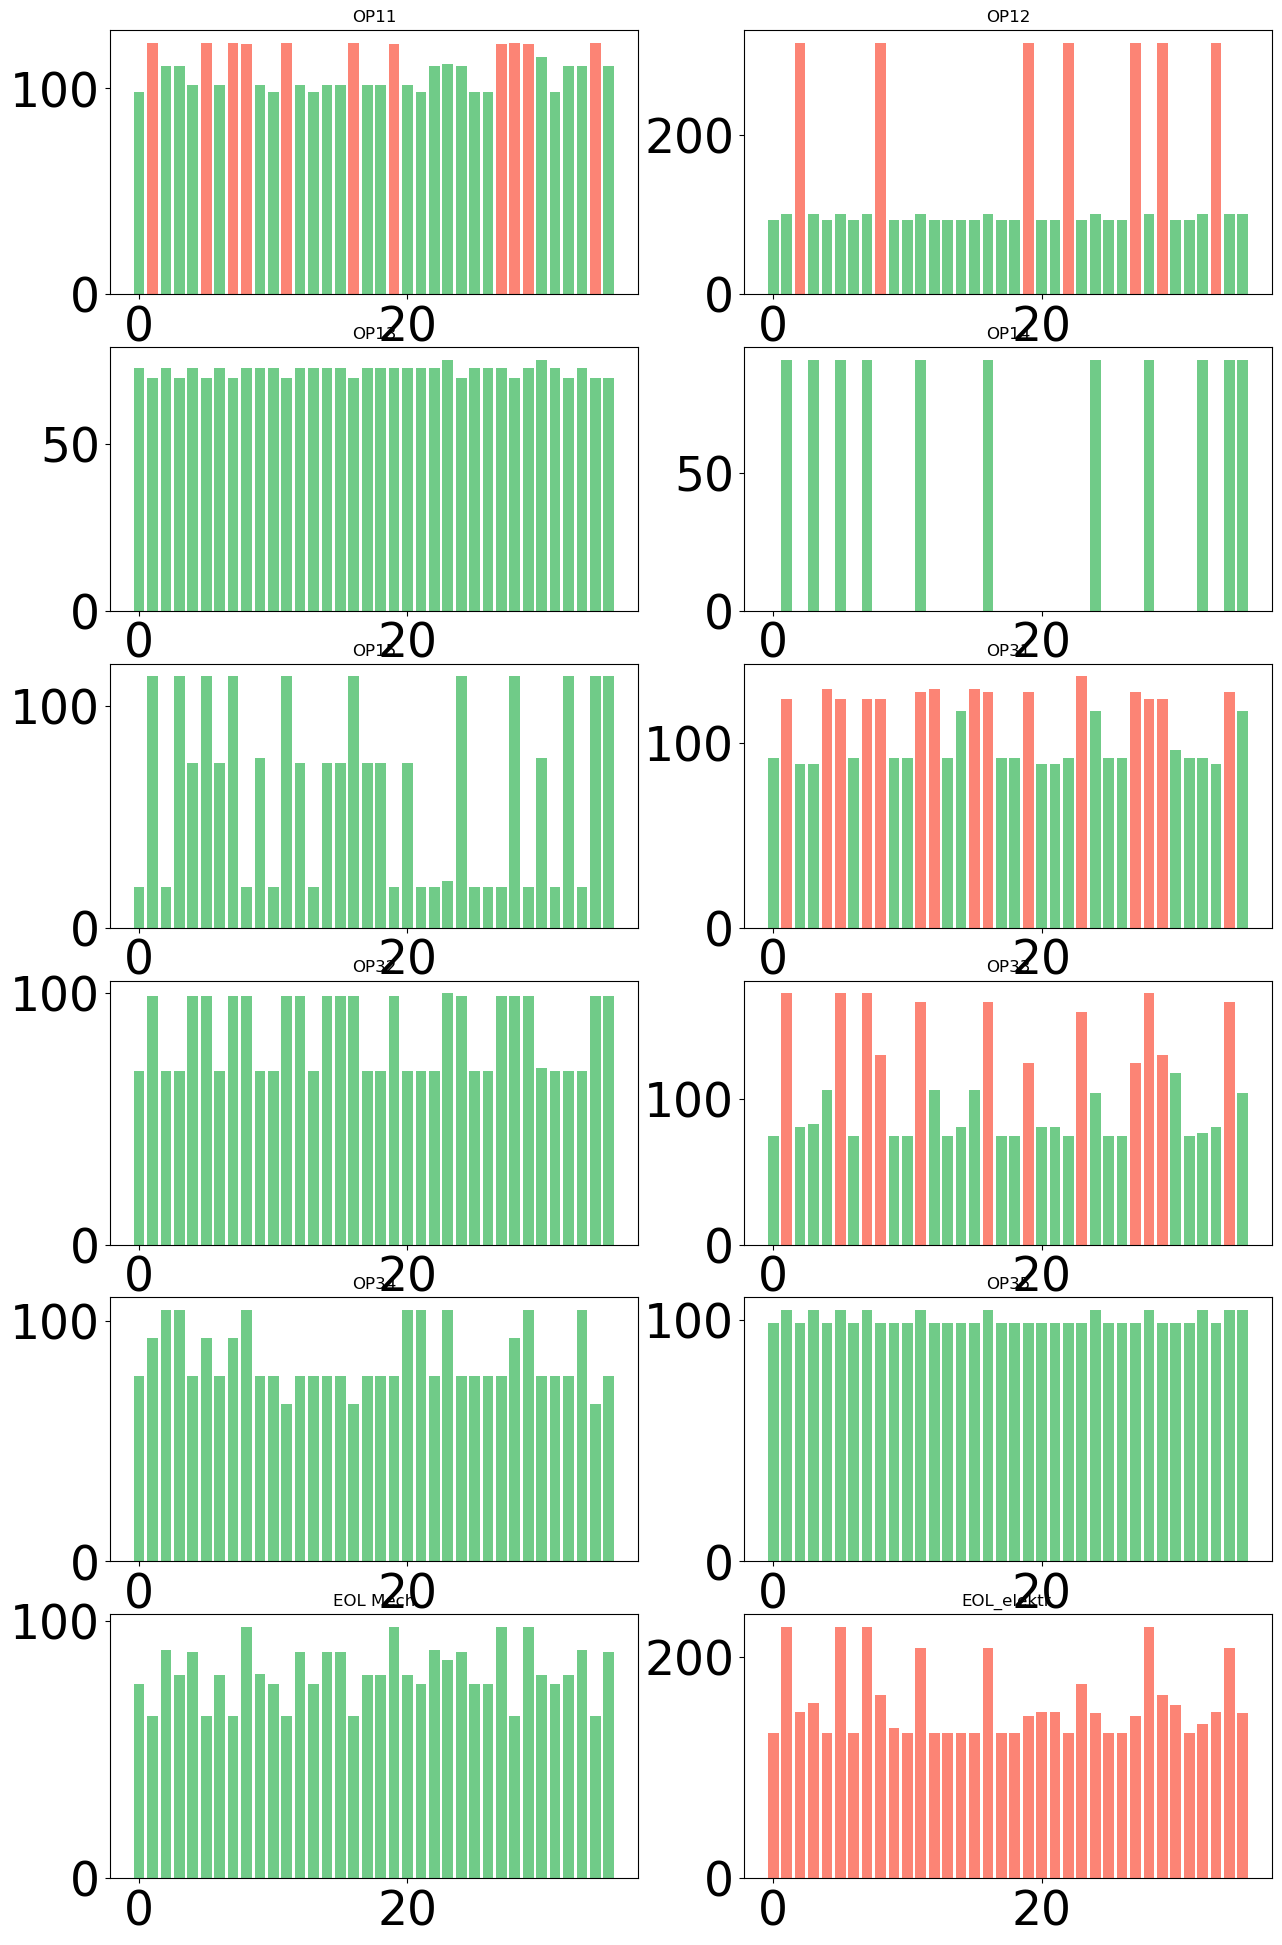

In [84]:
if linie == 'A':
    data = data_A
elif linie == 'B':
    data = data_B

if goal == 'Werkerlast':
    data = data.sort_values(by='Deadline')
    plot_werkerlast_bar(data)

In [11]:
data = data_A[data_A.columns[:12]].values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), ".."))
from misc_utils.color_palette import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
savepath='heatmap_workload.svg'

In [2]:
def _moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

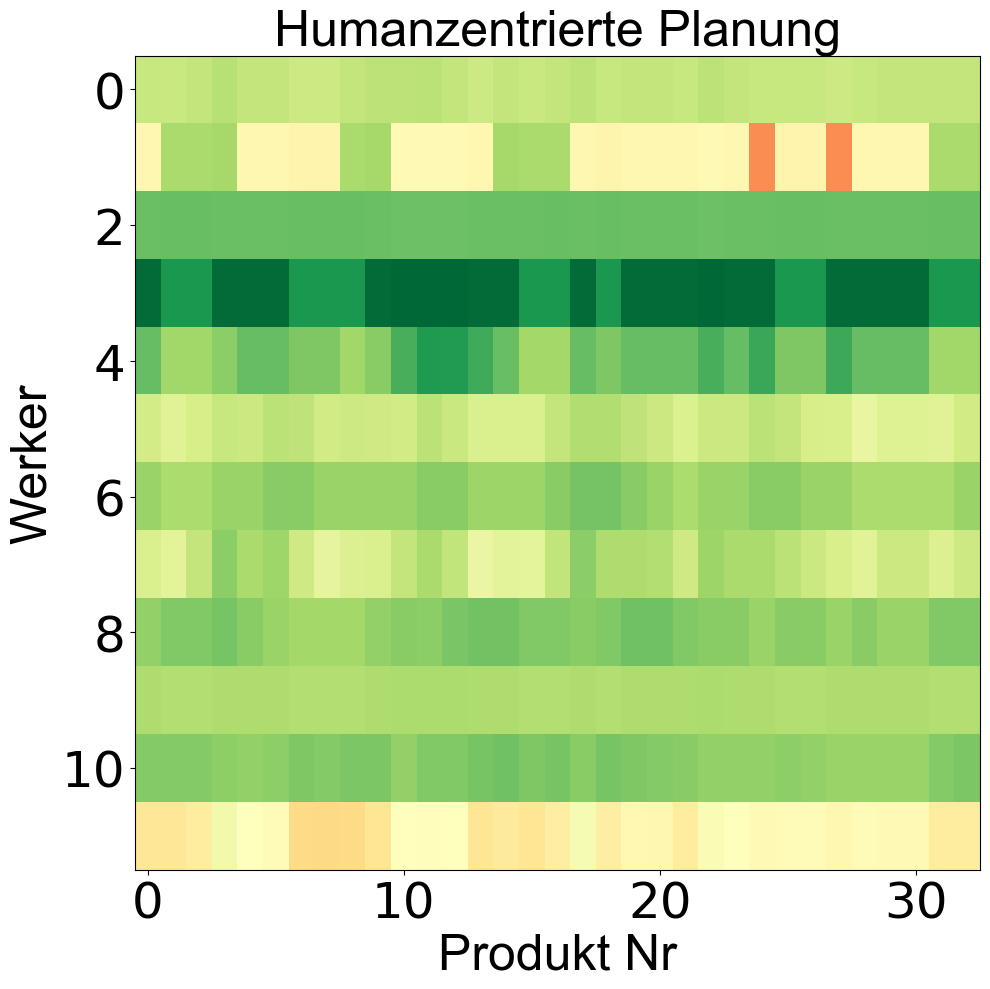

In [7]:
plt.rcParams["xtick.labelsize"] = 36
plt.rcParams["ytick.labelsize"] = 36
# Durch DB Abfrage ersetzen
# Durch DB Abfrage ersetzen
data_A = pd.read_json('PlanA.json')
data_B = pd.read_json('PlanB.json')

workload = data_A[data_A.columns[:12]].values.transpose()
workload = np.array([_moving_average(workload[i, :], 4) for i in range(workload.shape[0])])
workload = 270 - workload
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(workload, cmap="RdYlGn", aspect="auto")
im.set_clim(vmin=0, vmax=250)
ax.set_ylabel("Werker", fontname="Arial", fontsize=36)
ax.set_xlabel("Produkt Nr", fontname="Arial", fontsize=36)
ax.set_yticks(np.arange(0, workload.shape[0], 2))
ax.set_title("Humanzentrierte Planung", fontname="Arial", fontsize=36)
fig.tight_layout()
if savepath is None:
    plt.show()
else:
    plt.savefig(savepath+'Humanzentriert.svg', format="svg")


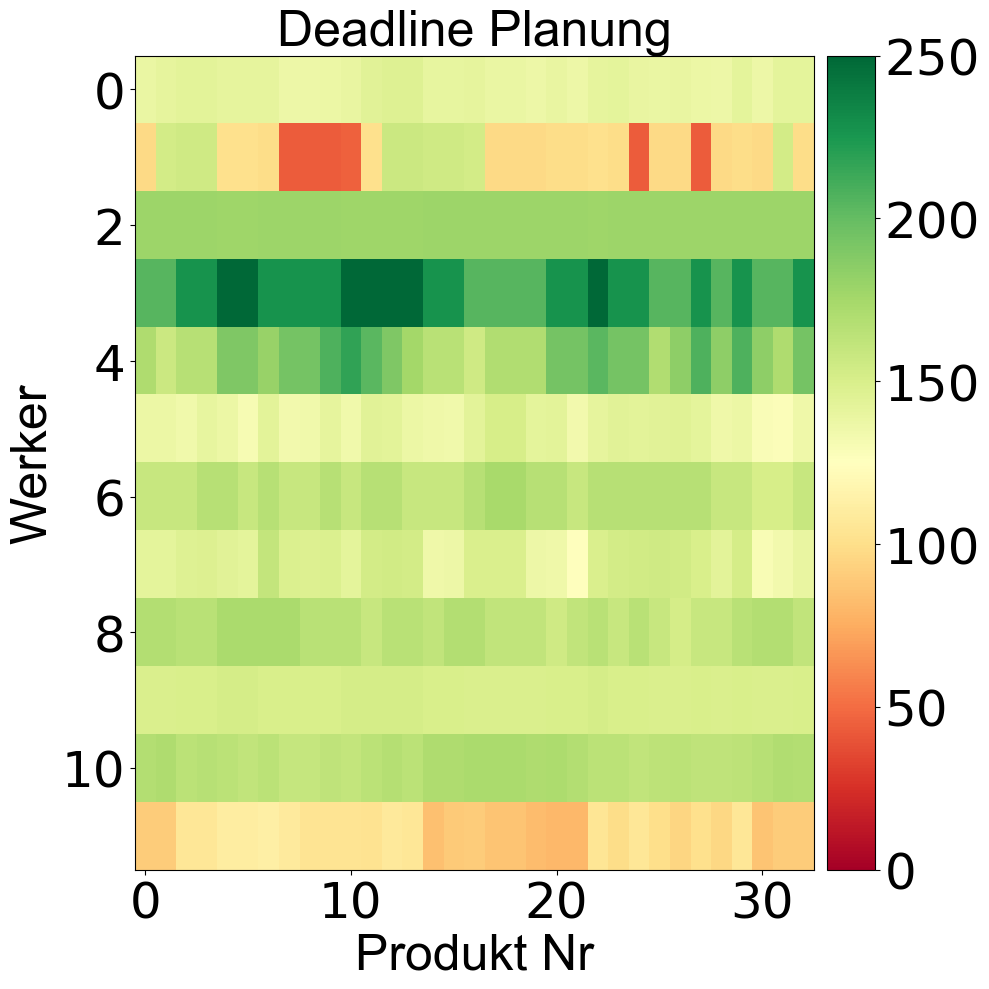

In [8]:
data_A = pd.read_json('PlanA.json')
data_B = pd.read_json('PlanB.json')
sorted_data = data_B.sort_values(by='Deadline')
workload = sorted_data[sorted_data.columns[:12]].values.transpose()
workload = 250 - workload
workload = np.array([_moving_average(workload[i, :], 4) for i in range(workload.shape[0])])
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(workload, cmap="RdYlGn", aspect="auto")
im.set_clim(vmin=0, vmax=250)
ax.set_ylabel("Werker", fontname="Arial", fontsize=36)
ax.set_xlabel("Produkt Nr", fontname="Arial", fontsize=36)
ax.set_yticks(np.arange(0, workload.shape[0], 2))
ax.set_title("Deadline Planung", fontname="Arial", fontsize=36)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="7%", pad="2%")
fig.add_axes(cax)
cb = fig.colorbar(
    im,
    cax=cax,
    orientation="vertical"
    # ticks=[np.min(workload) + 1, np.median(workload), np.max(workload)]
)
# cb.set_ticklabels(["Min (%.2f)"%np.min(workload), "Median (%.2f)"%np.median(workload), "Max (%.2f)"%np.max(workload)], fontname="Arial", fontsize=34, rotation=30)
fig.tight_layout()
if savepath is None:
    plt.show()
else:
    plt.savefig(savepath+'Deadline.svg', format="svg")